# GDELT Data with relationship index

- GDELT event records are stored in an expanded version of the dyadic CAMEO format,capturing two actors and the action performed by Actor1 upon Actor2.
- GDELT uses CAMEO event taxonomy, which is a collection of more than 300 types of events organized into a hierarchical taxonomy and recorded in the files as a numeric code.
- GDELT uses PETRARCH2 with a Stanford coreNLP parser for cameo coding. A detailed description of PETRARCH2 can be found at the following URL:https://buildmedia.readthedocs.org/media/pdf/petrarch/latest/petrarch.pdf


- https://github.com/abresler/gdeltr2


### GDELT URL

- GDELT data site: http://gdeltproject.org/data.html
- Additional explanation about GDLET 1: http://data.gdeltproject.org/documentation/ISA.2013.GDELT.pdf
- Raw data site: http://data.gdeltproject.org/events/index.html
- GDELT Code Book: http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf
- CAMEO Code Book: http://data.gdeltproject.org/documentation/CAMEO.Manual.1.1b3.pdf

#### Additional notice

- Using google big query: https://bcho.tistory.com/1116

## Using gdeltPyR

- I used gdeltPyR to use gdelt data.
- pypi.org: https://pypi.org/project/gdelt/
- github : https://github.com/linwoodc3/gdeltPyR

In [4]:
from time import gmtime, strftime
strftime("%Y-%m-%d-%W %H:%M:%S", gmtime())[:10]

'2020-11-15'

In [1]:
## package import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdelt
import os
import datetime
from time import gmtime, strftime
from dateutil.parser import parse
from collections import Counter
from dateutil.relativedelta import relativedelta
#import pycountry

import matplotlib.pyplot as plt
import gdelt
# ipynb 내부에서 matplotlib를 잘 보이게 하려면 필요한 명령어이다.
%matplotlib inline


## Download GDELT 1.0


### Notification

GDELT 1.0 consists events and GKG DATA. 

GDELT 2.0 only supports 20150218230000 and consist event, mention and GKG


In [3]:
# setting a date range
cur_year = 1979
end_year = 2005

# since old dates by month
cur_month = datetime.datetime(2013,3,1)
end_month = datetime.datetime(2013,5,1)

In [4]:
gd = gdelt.gdelt(version=2)
results = gd.Search(['%s %s %s'%('2020', '10', '10')],table='events')
results.to_pickle("20201010events.pkl")

In [5]:
results =  pd.read_pickle("20201010events.pkl")

In [5]:
results.columns

Index(['GLOBALEVENTID', 'SQLDATE', 'MonthYear', 'Year', 'FractionDate',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1KnownGroupCode',
       'Actor1EthnicCode', 'Actor1Religion1Code', 'Actor1Religion2Code',
       'Actor1Type1Code', 'Actor1Type2Code', 'Actor1Type3Code', 'Actor2Code',
       'Actor2Name', 'Actor2CountryCode', 'Actor2KnownGroupCode',
       'Actor2EthnicCode', 'Actor2Religion1Code', 'Actor2Religion2Code',
       'Actor2Type1Code', 'Actor2Type2Code', 'Actor2Type3Code', 'IsRootEvent',
       'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode',
       'QuadClass', 'GoldsteinScale', 'NumMentions', 'NumSources',
       'NumArticles', 'AvgTone', 'Actor1Geo_Type', 'Actor1Geo_FullName',
       'Actor1Geo_CountryCode', 'Actor1Geo_ADM1Code', 'Actor1Geo_ADM2Code',
       'Actor1Geo_Lat', 'Actor1Geo_Long', 'Actor1Geo_FeatureID',
       'Actor2Geo_Type', 'Actor2Geo_FullName', 'Actor2Geo_CountryCode',
       'Actor2Geo_ADM1Code', 'Actor2Geo_ADM2Code

In [16]:
cur_date = datetime.datetime(2019,9,1)
end_date = datetime.datetime(2020,10,31)

### Daily gdelt 1.0

- Data after February 2015 must be downloaded daily, not monthly data, so a daily downloader using cur_date must be used.

In [ ]:
gd = gdelt.gdelt(version=1)
os.makedirs('gdelt/event1',exist_ok=True)

while cur_date <= end_date:
    print("%s-%s-%s"%(cur_date.year, cur_date.month, cur_date.day))    
    if os.path.exists("gdelt/event1/%s-%s-%s_event1.pkl"%(cur_date.year, cur_date.month, cur_date.day)):
        pass    
    if not os.path.exists("gdelt/event1/%s-%s-%s_event1.pkl"%(cur_date.year, cur_date.month, cur_date.day)):
        year = cur_date.year
        month = str(cur_date.month)
        day = str(cur_date.day)
    
        if cur_date.month < 10:
            month = "0"+month
        if cur_date.day < 10:
            day = "0"+day
        try:
            results = gd.Search(['%s %s %s'%(year, month, day)],table='events',coverage=True, translation=False)
            results.to_pickle("gdelt/event1/%s-%s-%s_event1.pkl"%(cur_date.year, cur_date.month, cur_date.day))
        except:
            print('%s %s %s'%(year, month, day), "This GDELT query returned no data.")

    cur_date+=datetime.timedelta(days=1)

2020-4-1
2020-4-2
2020 04 02 This GDELT query returned no data.
2020-4-3
2020-4-4
2020-4-5
2020-4-6


## Download GDELT 2.0

- If users need event data, they can use events. If you want to add information about the event and the press that mentions the event, use metion in conjunction with the event data.

In [4]:
cur_date = datetime.datetime(2019,9,1)
end_date = datetime.datetime(2020,10,31)

In [ ]:
## setting download GDELT version2 event

gd = gdelt.gdelt(version=2)

os.makedirs('Gdelt/gdelt2/event',exist_ok=True)

while cur_date < end_date:
    print("%s-%s-%s"%(cur_date.year, cur_date.month, cur_date.day))    
    if os.path.exists("Gdelt/gdelt2/event/%s-%s-%s_event2.pkl"%(cur_date.year, cur_date.month, cur_date.day)):
        pass    
    if not os.path.exists("Gdelt/event/%s-%s-%s_event2.pkl"%(cur_date.year, cur_date.month, cur_date.day)):
        year = cur_date.year
        month = str(cur_date.month)
        day = str(cur_date.day)
    
        if cur_date.month < 10:
            month = "0"+month
        if cur_date.day < 10:
            day = "0"+day
            
        gd1 = gdelt.gdelt(version=2)

        try:
            results = gd.Search(['%s %s %s'%(year, month, day)],table='events',coverage=True, translation=False)
            results.to_pickle("Gdelt/gdelt2/event/%s-%s-%s_event2.pkl"%(cur_date.year, cur_date.month, cur_date.day))
        except: 
            print('%s %s %s'%(year, month, day), "This GDELT query returned no data.")

    cur_date+=datetime.timedelta(days=1)
## curdate가 넘어갔기 때문에 다시 원상복귀시킴
cur_date = datetime.datetime(2019,9,1)

2019-9-1
2019-9-2
2019-9-3
2019-9-4
2019-9-5
2019-9-6
2019-9-7
2019-9-8
2019-9-9
2019-9-10
2019-9-11


In [7]:
## setting download GDELT mentsions
gd = gdelt.gdelt(version=2)

os.makedirs('gdelt/gdelt2/mention',exist_ok=True)

while cur_date < end_date:
    print("%s-%s-%s"%(cur_date.year, cur_date.month, cur_date.day))    
    if os.path.exists("gdelt/gdelt2/mention/%s-%s-%s_mention.pkl"%(cur_date.year, cur_date.month, cur_date.day)):
        pass    
    if not os.path.exists("gdelt/gdelt2/mention/%s-%s-%s_mention.pkl"%(cur_date.year, cur_date.month, cur_date.day)):
        year = str(cur_date.year)
        month = str(cur_date.month)
        day = str(cur_date.day)
    
        if cur_date.month < 10:
            month = "0"+month
        if cur_date.day < 10:
            day = "0"+day
        
        try:
            results = gd.Search(['%s %s %s'%(year, month, day)],table='mentions',coverage=False, translation=False)
            results.to_pickle("Gdelt/gdelt2/mention/%s-%s-%s_mention.pkl"%(cur_date.year, cur_date.month, cur_date.day))
        except:
            print("")

    cur_date+=datetime.timedelta(days=1)
## curdate가 넘어갔기 때문에 다시 원상복귀시킴
cur_date = datetime.datetime(2019,9,1)

2020-11-1


C:\ProgramData\Anaconda3\lib\site-packages\gdelt\parallel.py:67: UserWarning: GDELT does not have a url for date time 20201101234500
  warnings.warn(message)
C:\ProgramData\Anaconda3\lib\site-packages\gdelt\parallel.py:103: UserWarning: GDELT did not return data for date time 20201101234500
  warnings.warn(message)



2020-11-2


C:\ProgramData\Anaconda3\lib\site-packages\gdelt\parallel.py:67: UserWarning: GDELT does not have a url for date time 20201102234500
  warnings.warn(message)
C:\ProgramData\Anaconda3\lib\site-packages\gdelt\parallel.py:103: UserWarning: GDELT did not return data for date time 20201102234500
  warnings.warn(message)



2020-11-3



C:\ProgramData\Anaconda3\lib\site-packages\gdelt\parallel.py:67: UserWarning: GDELT does not have a url for date time 20201103234500
  warnings.warn(message)
C:\ProgramData\Anaconda3\lib\site-packages\gdelt\parallel.py:103: UserWarning: GDELT did not return data for date time 20201103234500
  warnings.warn(message)


In [9]:
## setting download GDELT version gkg
gd = gdelt.gdelt(version=2)

os.makedirs('Gdelt/gdelt2/GKG2',exist_ok=True)

while cur_date < end_date:
    print("%s-%s-%s"%(cur_date.year, cur_date.month, cur_date.day))
    if os.path.exists("Gdelt/gdelt2/GKG2/%s-%s-%sGKG2.pkl"%(cur_date.year, cur_date.month, cur_date.day)):
        pass 
    if not os.path.exists("Gdelt/gdelt2/GKG2/%s-%s-%sGKG2.pkl"%(cur_date.year, cur_date.month, cur_date.day)):

        year = cur_date.year
        month = str(cur_date.month)
        day = str(cur_date.day)
    
        if cur_date.month < 10:
            month = "0"+month
        if cur_date.day < 10:
            day = "0"+day

        results = gd.Search(['%s %s %s'%(year, month, day)],table='gkg',coverage=True, translation=False)
        results.to_pickle("Gdelt/gdelt2/GKG2/%s-%s-%sGKG2.pkl"%(cur_date.year, cur_date.month, cur_date.day))

    cur_date+=datetime.timedelta(days=1)

2020-11-1


AssertionError: group argument must be None for now

## Loading data

### Load gdelt1

In [10]:
def save_dyadicgdelt1(file_dir, nation1, nation2):
    dft = pd.DataFrame()
    file_list = os.listdir(file_dir)
    #actor1 = nation1 # add iso code convert code
    #actor2 = nation2
    nation_list1 = [nation1, nation2]
    nation_list2 = [nation2, nation1]
    
    for i in file_list:
        print(i)
        if i.endswith(".pkl"):
            tmp = pd.read_pickle(file_dir+"/"+i)
            tmp = tmp[tmp["Actor1CountryCode"].apply(lambda x: x in nation_list1)]
            tmp = tmp[tmp["Actor2CountryCode"].apply(lambda x: x in nation_list2)]
            dft = pd.concat([dft, tmp], sort=False) 
            dft = dft.loc[dft['Actor1CountryCode'] != dft['Actor2CountryCode']]
            dft = dft.reset_index(drop=True)
            dft['SQLDATE'] = dft['SQLDATE'].apply(lambda x: parse(str(x)))
                                                  
    return dft

In [11]:
## making dyadic df and matching mention df

actors = ["CHN", "KOR", "USA", "RUS", 'TWN', "JPN", 'DEU', 'FRA', 'GBR', 'IND', 'SGP', 'AUS', 'TUR', 'ITA', 'IDN', 'MEX',
         'ZAF', 'SAU']
actors1 = ["CHN", "KOR", "USA", "RUS", 'PRK', 'TWN', "JPN", ]
file_dir = "Gdelt/event1"
for nation1 in actors1:
    for nation2 in actors1:
        if nation1 == nation2:
            break
        event_df = save_dyadicgdelt1(file_dir, nation1, nation2)        
        
        ## non goverment actors
        df_all = event_df[~event_df['Actor2Code'].str.contains("MNC|NGO")].reset_index(drop=True)
        df_all = df_all[~df_all['Actor1Code'].str.contains("MNC|NGO")].reset_index(drop=True)
        df_all['SQLDATE'] = df_all['SQLDATE'].apply(lambda x: parse(str(x)).strftime("%Y%m%d"))
                
        nation1_df = df_all[df_all["Actor1CountryCode"].apply(lambda x: x in nation1)]
        nation2_df = df_all[df_all["Actor1CountryCode"].apply(lambda x: x in nation2)]
        
        os.makedirs('Gdelt/gdelt1/result',exist_ok=True)
        
        name1 = 'Gdelt/gdelt1/result/{}{}.csv'.format(nation1, nation2)
        nation1_df.to_csv(name1, mode='w')
        
        name2 = 'Gdelt/gdelt1/result/{}{}.csv'.format(nation2, nation1)
        nation2_df.to_csv(name2, mode='w')

2020-4-1_event1.pkl
2020-4-3_event1.pkl
2020-4-4_event1.pkl
2020-4-5_event1.pkl
2020-4-6_event1.pkl
2020-4-7_event1.pkl
2020-4-1_event1.pkl
2020-4-3_event1.pkl
2020-4-4_event1.pkl
2020-4-5_event1.pkl
2020-4-6_event1.pkl
2020-4-7_event1.pkl
2020-4-1_event1.pkl
2020-4-3_event1.pkl
2020-4-4_event1.pkl
2020-4-5_event1.pkl
2020-4-6_event1.pkl
2020-4-7_event1.pkl
2020-4-1_event1.pkl
2020-4-3_event1.pkl
2020-4-4_event1.pkl
2020-4-5_event1.pkl
2020-4-6_event1.pkl
2020-4-7_event1.pkl
2020-4-1_event1.pkl
2020-4-3_event1.pkl
2020-4-4_event1.pkl
2020-4-5_event1.pkl
2020-4-6_event1.pkl
2020-4-7_event1.pkl
2020-4-1_event1.pkl
2020-4-3_event1.pkl
2020-4-4_event1.pkl
2020-4-5_event1.pkl
2020-4-6_event1.pkl
2020-4-7_event1.pkl
2020-4-1_event1.pkl
2020-4-3_event1.pkl
2020-4-4_event1.pkl
2020-4-5_event1.pkl
2020-4-6_event1.pkl
2020-4-7_event1.pkl
2020-4-1_event1.pkl
2020-4-3_event1.pkl
2020-4-4_event1.pkl
2020-4-5_event1.pkl
2020-4-6_event1.pkl
2020-4-7_event1.pkl
2020-4-1_event1.pkl
2020-4-3_event1.pkl


### load gdelt2

- The mention of GDELT2.0 was downloaded first, and event df and mention df were combined based on EVENTID.
- Future improvements: The for statement is used for each dyadic in this. It would be more efficient to change to a way that continuously ejects csv files in a way like twint.

In [ ]:
## Loading mention
file_dir = "E:/Gdelt/mention"
dft = pd.DataFrame()
file_list = os.listdir(file_dir)
for i in file_list:
    print(i)
    if i.endswith(".pkl"):
        tmp = pd.read_pickle(file_dir+"/"+i)
        dft = pd.concat([dft, tmp], sort=False) 
        dft = dft.reset_index(drop=True)
        

2
2019-1-10_mention.pkl
2019-1-11_mention.pkl
2019-1-12_mention.pkl
2019-1-13_mention.pkl
2019-1-14_mention.pkl
2019-1-15_mention.pkl
2019-1-16_mention.pkl
2019-1-17_mention.pkl
2019-1-18_mention.pkl
2019-1-19_mention.pkl
2019-1-1_mention.pkl
2019-1-20_mention.pkl
2019-1-21_mention.pkl
2019-1-22_mention.pkl
2019-1-23_mention.pkl
2019-1-24_mention.pkl
2019-1-25_mention.pkl
2019-1-26_mention.pkl
2019-1-27_mention.pkl
2019-1-28_mention.pkl
2019-1-29_mention.pkl
2019-1-2_mention.pkl
2019-1-30_mention.pkl
2019-1-31_mention.pkl
2019-1-3_mention.pkl
2019-1-4_mention.pkl
2019-1-5_mention.pkl
2019-1-6_mention.pkl
2019-1-7_mention.pkl
2019-1-8_mention.pkl
2019-1-9_mention.pkl
2019-10-10_mention.pkl
2019-10-11_mention.pkl
2019-10-12_mention.pkl
2019-10-13_mention.pkl
2019-10-14_mention.pkl
2019-10-15_mention.pkl
2019-10-16_mention.pkl
2019-10-17_mention.pkl
2019-10-18_mention.pkl
2019-10-19_mention.pkl
2019-10-1_mention.pkl
2019-10-20_mention.pkl
2019-10-21_mention.pkl
2019-10-22_mention.pkl
2019

2020-1-19_mention.pkl
2020-1-1_mention.pkl
2020-1-20_mention.pkl
2020-1-21_mention.pkl
2020-1-22_mention.pkl
2020-1-23_mention.pkl
2020-1-24_mention.pkl
2020-1-25_mention.pkl
2020-1-26_mention.pkl
2020-1-27_mention.pkl
2020-1-28_mention.pkl
2020-1-29_mention.pkl
2020-1-2_mention.pkl
2020-1-30_mention.pkl
2020-1-31_mention.pkl
2020-1-3_mention.pkl
2020-1-4_mention.pkl
2020-1-5_mention.pkl
2020-1-6_mention.pkl
2020-1-7_mention.pkl
2020-1-8_mention.pkl
2020-1-9_mention.pkl
2020-10-10_mention.pkl
2020-10-1_mention.pkl
2020-10-2_mention.pkl
2020-10-5_mention.pkl
2020-10-9_mention.pkl
2020-2-10_mention.pkl
2020-2-11_mention.pkl
2020-2-12_mention.pkl
2020-2-13_mention.pkl
2020-2-14_mention.pkl
2020-2-15_mention.pkl
2020-2-16_mention.pkl
2020-2-17_mention.pkl
2020-2-18_mention.pkl
2020-2-19_mention.pkl
2020-2-1_mention.pkl
2020-2-20_mention.pkl
2020-2-21_mention.pkl
2020-2-22_mention.pkl
2020-2-23_mention.pkl
2020-2-24_mention.pkl
2020-2-25_mention.pkl
2020-2-26_mention.pkl
2020-2-27_mention.p

In [ ]:
def save_dyadicgdelt(file_dir, nation1, nation2):
    dft = pd.DataFrame()
    file_list = os.listdir(file_dir)
    #actor1 = nation1 # add iso code convert code
    #actor2 = nation2
    nation_list1 = [nation1, nation2]
    nation_list2 = [nation2, nation1]
    
    for i in file_list:
        print(i)
        if i.endswith(".pkl"):
            tmp = pd.read_pickle(file_dir+"/"+i)
            tmp = tmp[tmp["Actor1CountryCode"].apply(lambda x: x in nation_list1)]
            tmp = tmp[tmp["Actor2CountryCode"].apply(lambda x: x in nation_list2)]
            #tmp = tmp[['GLOBALEVENTID','SQLDATE','Actor1Code','Actor1CountryCode',
                       #'Actor2Code', 'Actor2Name', 'Actor2CountryCode',
                       #'IsRootEvent', 'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode', 'QuadClass',
                       #'GoldsteinScale','NumMentions','NumArticles','AvgTone', 'AvgTone', 'SOURCEURL']]
            dft = pd.concat([dft, tmp], sort=False) 
            dft = dft.loc[dft['Actor1CountryCode'] != dft['Actor2CountryCode']]
            dft = dft.reset_index(drop=True)
            #dft['SQLDATE']= pd.to_datetime(dft['SQLDATE'], format='%Y%m%d', errors='ignore')
            dft['SQLDATE'] = dft['SQLDATE'].apply(lambda x: parse(str(x)))
                                                  
    return dft

In [ ]:
## making dyadic df and matching mention df
actors = ["CHN", "KOR", "USA", "RUS", 'TWN', "JPN", 'DEU', 'FRA', 'GBR', 'IND', 'SGP', 'AUS', 'TUR', 'ITA', 'IDN', 'MEX',
         'ZAF', 'SAU']
#actors1 = ["CHN", "KOR", "USA", "RUS", 'PRK', 'TWN', "JPN", ]
actots2 = ['CHN', 'KOR']
file_dir = "E:/Gdelt/mention/event2"
for nation1 in actors2:
    for nation2 in actors2:
        if nation1 == nation2:
            break
        event_df = save_dyadicgdelt(file_dir, nation1, nation2)
        
        ## 일반적으로 avtone은 event data에 있기 때문에 avtone만 보고 싶으시면 event data 만 사용하시면 됩니다. merge는 선택적으로 해주세요.
        df_all = pd.merge(event_df, dft, on='GLOBALEVENTID')
        
        ## duplicate data
        df_all = df_all.drop_duplicates(subset=['SOURCEURL'], keep=False)
        ## non goverment actors
        df_all = df_all[~df_all['Actor2Code'].str.contains("MNC|NGO")].reset_index(drop=True)
        df_all = df_all[~df_all['Actor1Code'].str.contains("MNC|NGO")].reset_index(drop=True)

        df_all = df_all[['GLOBALEVENTID', 'Actor1Code','Actor1CountryCode', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode',
                     'IsRootEvent', 'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode', 'QuadClass', 'GoldsteinScale',
                     'NumMentions', 'NumArticles', 'AvgTone','SOURCEURL','MentionTimeDate', 'MentionType', 'MentionSourceName', 'InRawText']]
        df_all['MentionTimeDate'] = df_all['MentionTimeDate'].apply(lambda x: parse(str(x)).strftime("%Y-%m-%d"))
        
        
        
        nation1_df = df_all[df_all["Actor1CountryCode"].apply(lambda x: x in nation1)]
        nation2_df = df_all[df_all["Actor1CountryCode"].apply(lambda x: x in nation2)]
        
        
        os.makedirs('Gdelt/gdelt2/result',exist_ok=True)
        
        name1 = 'Gdelt/gdelt2/result/{}{}.csv'.format(nation1, nation2)
        nation1_df.to_csv(name1, mode='w')
        
        name2 = 'Gdelt/gdelt2/result/{}{}.csv'.format(nation2, nation1)
        nation2_df.to_csv(name2, mode='w')
        

## preprocessing for dyadic data

 - duplicate data
 - non goverment actors
 - not significant old data

In [12]:
## Collects the csv files for each country as a whole.

file_dir = "Gdelt/gdelt2/result"
file_list = os.listdir(file_dir)
new_df = pd.DataFrame()

for a in file_list:
    route = file_dir + '/' + a
    
    df = pd.read_csv(route, parse_dates = True)
    ## duplicate data
    df = df.drop_duplicates(subset=['SOURCEURL'], keep=False)
    ## non goverment actors
    df = df[~df['Actor2Code'].str.contains("MNC|NGO")].reset_index(drop=True)
    df = df[~df['Actor1Code'].str.contains("MNC|NGO")].reset_index(drop=True)

    df = df[['GLOBALEVENTID', 'Actor1Code','Actor1CountryCode', 'Actor2Code', 'Actor2Name', 'Actor2CountryCode',
             'IsRootEvent', 'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode', 'QuadClass', 'GoldsteinScale',
             'NumMentions', 'NumArticles', 'AvgTone','SOURCEURL','MentionTimeDate', 'MentionType', 'MentionSourceName', 'InRawText']]
    
    df['MentionTimeDate'] = df['MentionTimeDate'].apply(lambda x: parse(str(x)).strftime("%Y-%m-%d"))
    df['dyad'] =  df["Actor1CountryCode"].astype(str) + "-"+  df["Actor2CountryCode"].astype(str)
    new_df = pd.concat([new_df, df])
    
    name = 'Gdelt/gdelt2/result/all_gdelt.csv'
    df.to_csv(name, mode='w')

## Weekly time series and visualization

- We see weekly 'GoldsteinScale','NumMentions','NumArticles','AvgTone'.
- Therefore, the data represented by the numerical figures are arranged over time.
- 일단 지금은 국가별로 선택하는 방법을 str.contains로 했습니다. 

In [15]:
df

,Unnamed: 0,GLOBALEVENTID,Actor1Code,Actor1CountryCode,Actor2Code,Actor2Name,Actor2CountryCode,IsRootEvent,EventCode,CAMEOCodeDescription,...,GoldsteinScale,NumMentions,NumArticles,AvgTone,SOURCEURL,MentionTimeDate,MentionType,MentionSourceName,InRawText,dyad
0,0,815184422,USA,USA,CHN,CHINESE,CHN,0,127,"Reject accusation, deny responsibility",...,-5.0,10,10,-2.583026,http://www.baystreet.ca/etfs/338/Oil-Prices-on...,2019-01-10,1,baystreet.ca,1,USA-CHN
1,1,815196458,USA,USA,CHN,CHINESE,CHN,1,51,Praise or endorse,...,3.4,2,2,4.494382,https://blog.timesunion.com/travelgal/nyc-chin...,2019-01-10,1,timesunion.com,0,USA-CHN
2,2,815219543,USA,USA,CHN,CHINA,CHN,1,311,Express intent to cooperate economically,...,5.2,10,10,-1.052632,https://iwradio.co.uk/2019/01/07/tesla-breaks-...,2019-01-10,1,iwradio.co.uk,1,USA-CHN
3,3,815219547,USA,USA,CHN,CHINESE,CHN,1,111,Criticize or denounce,...,-2.0,16,8,1.066667,https://www.gadgetsnow.com/slideshows/10-reaso...,2019-01-10,1,gadgetsnow.com,1,USA-CHN
4,4,815238157,USA,USA,CHN,CHINESE,CHN,1,112,"Accuse, not specified below",...,-2.0,2,2,-4.972376,https://news.mb.com.ph/2019/01/10/us-to-blame-...,2019-01-10,1,mb.com.ph,0,USA-CHN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18938,18938,945641525,USA,USA,CHN,CHINA,CHN,0,20,"Appeal, not specified below",...,3.0,2,2,-0.240192,https://www.nzherald.co.nz/world/news/article....,2020-09-09,1,nzherald.co.nz,0,USA-CHN
18939,18939,945631848,USA,USA,CHNEDU,CHINA,CHN,1,42,Make a visit,...,1.9,2,2,-0.951249,https://www.2lt.com.au/students-from-china-stu...,2020-09-09,1,2lt.com.au,0,USA-CHN
18940,18940,945643218,USA,USA,CHN,BEIJING,CHN,0,172,"Impose administrative sanctions, not specifie...",...,-5.0,4,4,-2.587800,https://www.dailymail.co.uk/news/article-87158...,2020-09-09,1,dailymail.co.uk,0,USA-CHN
18941,18941,945647721,USAGOV,USA,CHN,CHINA,CHN,1,36,Express intent to meet or negotiate,...,4.0,2,2,-7.142857,http://www.floppingaces.net/most-wanted/washin...,2020-09-09,1,floppingaces.net,0,USA-CHN


In [13]:
df = pd.read_csv('Gdelt/gdelt2/result/all_gdelt.csv')

In [16]:
df = df[df['dyad'].str.contains("USA")].reset_index(drop=True)
df = df[df['dyad'].str.contains("CHN")].reset_index(drop=True)
df = df.loc[df["MentionTimeDate"] >= "2019-11-01"]

df['MentionTimeDate'] = pd.to_datetime(df.MentionTimeDate)
df.set_index('MentionTimeDate', inplace=True)
df_date = df[['dyad','NumArticles','AvgTone']]
df_date = df_date.dropna(axis=0)

### resampling

- resampling은 한 달 단위로 데이터를 변환시켜줍니다.

In [17]:
chus = df_date.resample(rule='1W').mean()

In [18]:
chus

,NumArticles,AvgTone
MentionTimeDate,,
2019-11-03,5.333333,-1.512732
2019-11-10,5.077778,-1.706804
2019-11-17,5.095890,-1.955902
2019-11-24,5.355932,-1.686389
2019-12-01,4.900000,-1.657941
2019-12-08,5.114865,-2.063652
2019-12-15,4.842105,-1.805513
2019-12-22,5.044304,-1.714584
2019-12-29,5.606061,-2.113442


###  시각화
 - matplotlib는 상당히 쉽게 시각화를 해준다.
 - seaborn이나 bokehn이 더 발전된 패키지. 확인해보면 좋습니다.

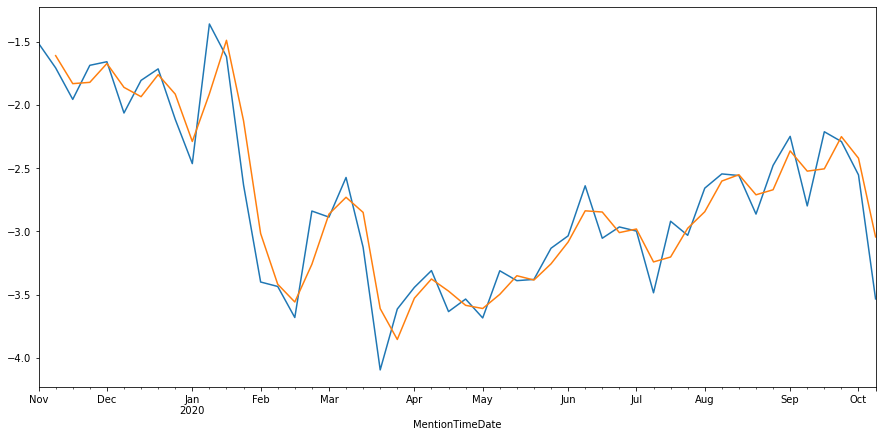

In [20]:
## weekly goldstein plot and mothly moving average plot
chus['AvgTone'].plot()
## Rollin은 이동 평균선을 만들어 줍니다. window2면 뒤로 3달 동안의 평균을 그려줍니다.
chus.rolling(window=2).mean()['AvgTone'].plot(figsize=(15,7))